# Analisis Restaurantes Michelin USA

In [22]:
import numpy as np 
import pandas as pd 
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency


In [3]:
file_path = 'usa_data.csv'
usa_data = pd.read_csv(file_path)
usa_data

,Name,Address,Cuisine,Longitude,Latitude,Award,GreenStar,FacilitiesAndServices,Description,Currency,Price Level,City,Country
0,The Inn at Little Washington,"309 Middle St., Washington, 22747, USA",American,-78.159535,38.713477,3 Stars,1,"Air conditioning,Interesting wine list,Restaur...",Chef Patrick O’Connell has long been the stewa...,$,4,Washington,USA
1,Per Se,"10 Columbus Circle, New York, 10019, USA",Contemporary,-73.982588,40.768054,3 Stars,0,"Air conditioning,Great view,Interesting wine l...",An experience at Thomas Keller’s Per Se is one...,$,4,New York,USA
2,Le Bernardin,"155 W. 51st St., New York, 10019, USA",Seafood,-73.982230,40.761770,3 Stars,0,"Air conditioning,Interesting wine list,Wheelch...",Maguy Le Coze and Eric Ripert’s icon has been ...,$,4,New York,USA
3,Eleven Madison Park,"11 Madison Ave., New York, 10010, USA",Vegan,-73.987241,40.741554,3 Stars,0,"Air conditioning,Interesting wine list,Restaur...",Chef Daniel Humm presides over this temple of ...,$,4,New York,USA
4,Masa,"10 Columbus Circle, New York, 10019, USA",Japanese,-73.982340,40.768190,3 Stars,0,"Air conditioning,Counter dining,Interesting wi...",There is nothing like an omakase in the care o...,$,4,New York,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470,Gusto Handcrafted Pasta & Pizza,"1901 Fremont Blvd., Seaside, 93955, USA",Italian-American,-121.841842,36.616747,Selected Restaurants,0,"Car park,Wheelchair access",The surroundings may not be glamorous (Montere...,$,2,Seaside,USA
1471,Sorella,"1760 Polk St., San Francisco, 94109, USA",Italian,-122.421053,37.793111,Selected Restaurants,0,"Air conditioning,Wheelchair access",The spirited younger sister to grande dame Acq...,$,3,San Francisco,USA
1472,Sushi ii,"100 West Coast Hwy., Ste. 202, Newport Beach, ...",Japanese,-117.907447,33.616359,Selected Restaurants,0,"Air conditioning,Car park,Counter dining,Notab...",Chef Susumu Ii is no stranger to the SoCal din...,$,4,Newport Beach,USA
1473,Cafe La Haye,"140 E. Napa St., Sonoma, 95476, USA",Californian,-122.455840,38.291970,Selected Restaurants,0,"Air conditioning,Terrace,Wheelchair access","For years, Cafe La Haye has been a standby off...",$,3,Sonoma,USA


In [4]:
print(usa_data.describe())

         Longitude     Latitude    GreenStar  Price Level
count  1475.000000  1475.000000  1475.000000  1475.000000
mean    -95.490825    37.143372     0.013559     2.808814
std      20.715889     4.352004     0.115692     0.903816
min    -123.719064    25.687032     0.000000     1.000000
25%    -118.365842    34.053230     0.000000     2.000000
50%     -87.632890    38.406103     0.000000     3.000000
75%     -74.005552    40.729197     0.000000     4.000000
max     -73.574934    41.980370     1.000000     4.000000


In [5]:
# Contar el número de ocurrencias por city
city_counts = usa_data['City'].value_counts()

# Tomar solo el top 20 de las ciudades
top_20_cities = city_counts.head(20)

top_20_cities

City
New York             373
Chicago              143
Washington           117
Los Angeles          109
San Francisco         96
Miami                 44
Orlando               44
Atlanta               39
San Diego             29
Tampa                 27
Oakland               21
Denver                19
Santa Monica          18
Miami Beach           16
Sacramento            14
Santa Barbara         12
Beverly Hills         11
Berkeley               9
Palo Alto              8
Carmel-by-the-Sea      8
Name: count, dtype: int64

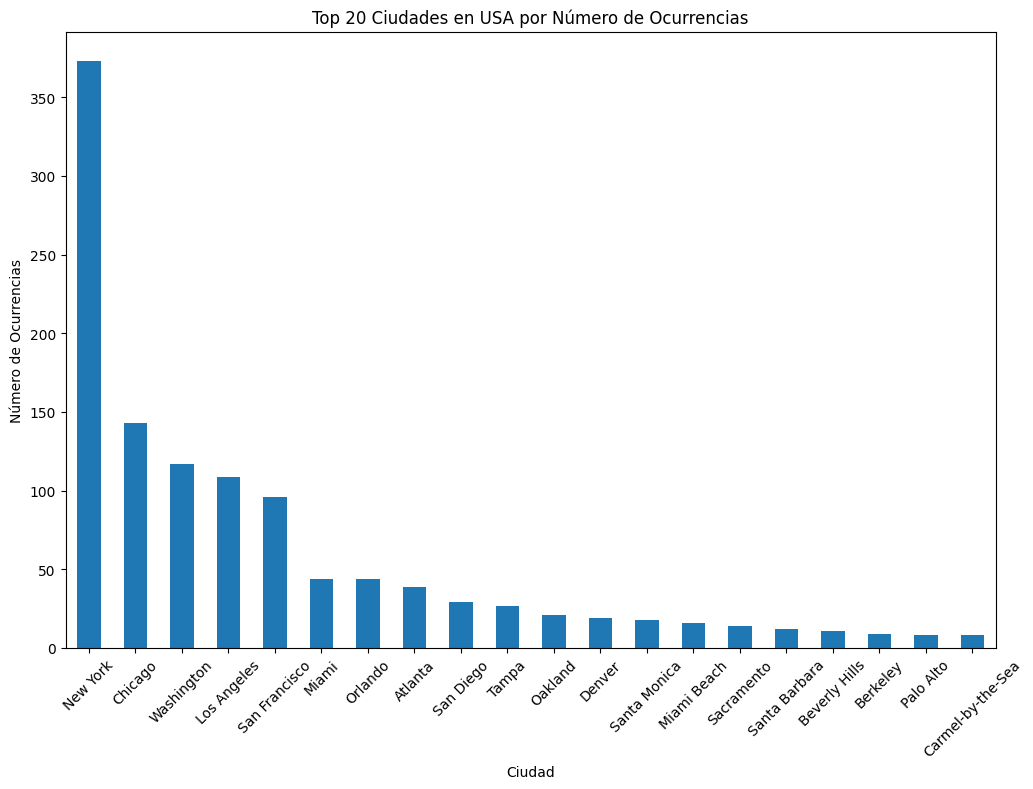

In [6]:
# Contar el número de ocurrencias por city
city_counts = usa_data['City'].value_counts()

# Tomar solo el top 20 de las ciudades
top_20_cities = city_counts.head(20)

# Crear una gráfica de barras para mostrar las ocurrencias por city
plt.figure(figsize=(12, 8))
top_20_cities.plot(kind='bar')
plt.title('Top 20 Ciudades en USA por Número de Ocurrencias')
plt.xlabel('Ciudad')
plt.ylabel('Número de Ocurrencias')
plt.xticks(rotation=45)
plt.show()

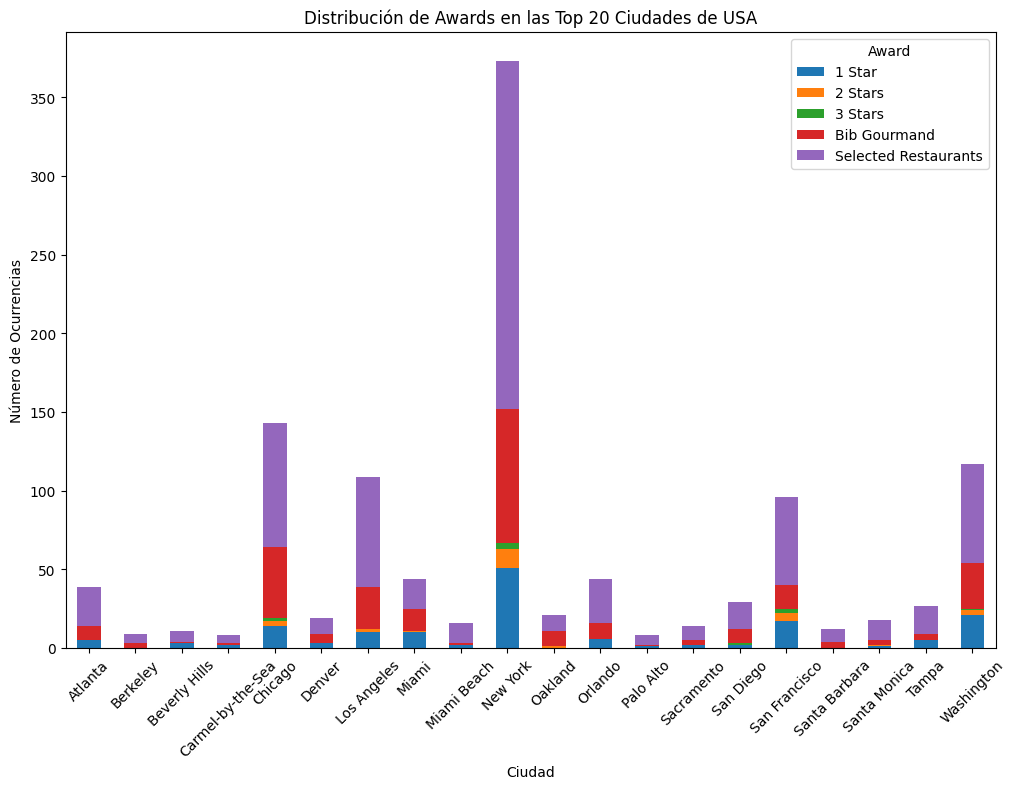

In [7]:
# Contar el número de ocurrencias por City
city_counts = usa_data['City'].value_counts()

# Tomar solo el top 20 de las ciudades
top_20_cities = city_counts.head(20).index

# Filtrar los datos para incluir solo las filas con las ciudades del top 20
top_20_data = usa_data[usa_data['City'].isin(top_20_cities)]

# Crear una tabla pivot para contar las ocurrencias de Award por City
pivot_table = top_20_data.pivot_table(index='City', columns='Award', aggfunc='size', fill_value=0)

# Crear una gráfica de barras apiladas para mostrar las ocurrencias por Award y City
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Distribución de Awards en las Top 20 Ciudades de USA')
plt.xlabel('Ciudad')
plt.ylabel('Número de Ocurrencias')
plt.xticks(rotation=45)
plt.legend(title='Award')
plt.show()

In [8]:
pivot_table = top_20_data.pivot_table(index='City', columns='Award', aggfunc='size', fill_value=0)

pivot_table

Award,1 Star,2 Stars,3 Stars,Bib Gourmand,Selected Restaurants
City,,,,,
Atlanta,5,0,0,9,25
Berkeley,0,0,0,3,6
Beverly Hills,3,0,0,1,7
Carmel-by-the-Sea,2,0,0,1,5
Chicago,14,3,2,45,79
Denver,3,0,0,6,10
Los Angeles,10,2,0,27,70
Miami,10,1,0,14,19
Miami Beach,2,0,0,1,13


In [9]:
# Contar el número de ocurrencias por city
city_counts = usa_data['City'].value_counts()

# Tomar solo el top 20 de las ciudades
top_20_cities = city_counts.head(20).index

# Filtrar los datos para incluir solo las filas con las ciudades del top 20
top_20_data = usa_data[usa_data['City'].isin(top_20_cities)]

# Crear una tabla pivot para contar las ocurrencias de Price Level por city
pivot_table_price = top_20_data.pivot_table(index='City', columns='Price Level', aggfunc='size', fill_value=0)

# Mostrar la tabla
print(pivot_table_price)

Price Level         1    2    3    4
City                                
Atlanta             2   18   10    9
Berkeley            3    4    1    1
Beverly Hills       0    1    1    9
Carmel-by-the-Sea   0    2    4    2
Chicago             4   68   35   36
Denver              0    6    7    6
Los Angeles         7   38   34   30
Miami               2   15   16   11
Miami Beach         1    3    7    5
New York           17  122  113  121
Oakland             5   11    4    1
Orlando             1   22    9   12
Palo Alto           0    2    5    1
Sacramento          1    5    5    3
San Diego           4   12    8    5
San Francisco       3   26   32   35
Santa Barbara       1    6    1    4
Santa Monica        0    4    9    5
Tampa               1   12    7    7
Washington          4   47   34   32


Price Level     1    2    3    4
City                            
Atlanta         2   18   10    9
Chicago         4   68   35   36
Los Angeles     7   38   34   30
Miami           2   15   16   11
New York       17  122  113  121
Orlando         1   22    9   12
San Diego       4   12    8    5
San Francisco   3   26   32   35
Tampa           1   12    7    7
Washington      4   47   34   32


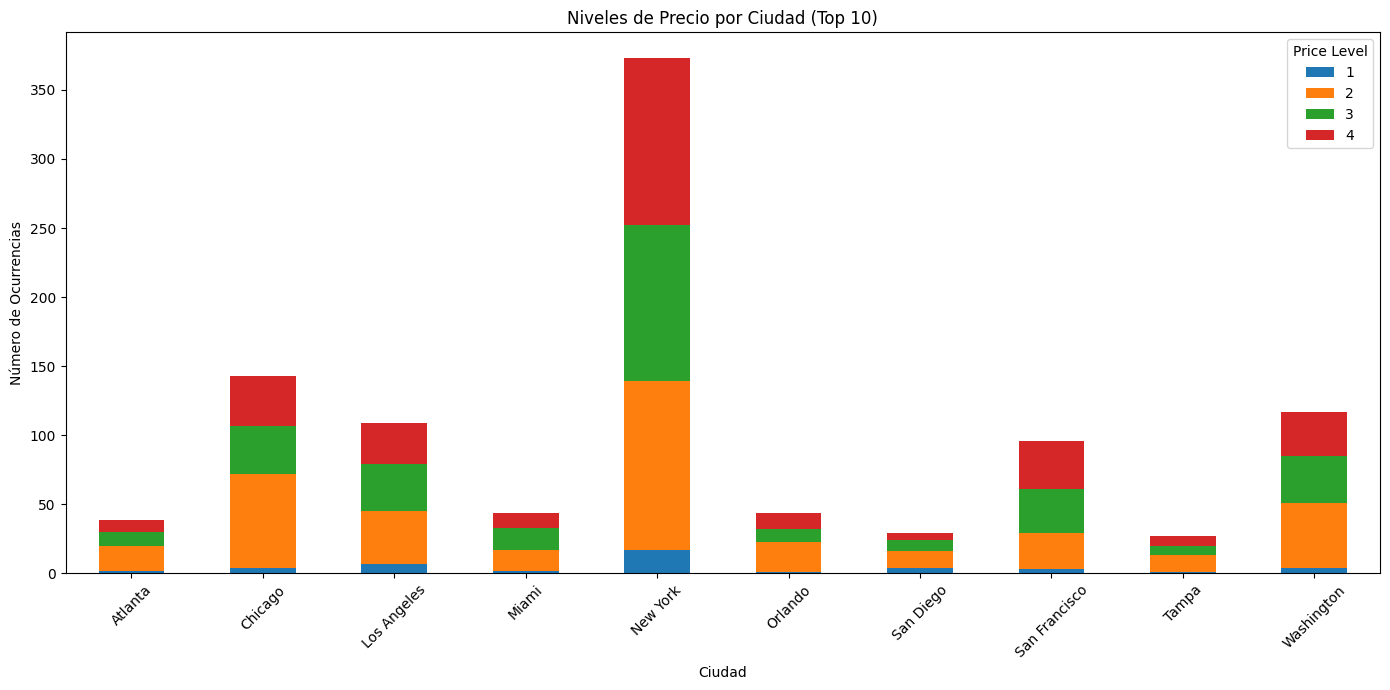

In [31]:

# Tomar solo el top 10 de las ciudades
top_10_cities = city_counts.head(10).index

# Filtrar los datos para incluir solo las filas con las ciudades del top 10
top_10_data = usa_data[usa_data['City'].isin(top_10_cities)]

# Crear una tabla pivote para contar las ocurrencias de Price Level por city
pivot_table_price = top_10_data.pivot_table(index='City', columns='Price Level', aggfunc='size', fill_value=0)

# Mostrar la tabla
print(pivot_table_price)

# Crear el gráfico de barras apiladas
pivot_table_price.plot(kind='bar', stacked=True, figsize=(14, 7))

# Configurar etiquetas y título
plt.xlabel('Ciudad')
plt.ylabel('Número de Ocurrencias')
plt.title('Niveles de Precio por Ciudad (Top 10)')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [10]:
# Crear una tabla pivot para contar las ocurrencias de GreenStar por city
pivot_table_greenstar = top_20_data.pivot_table(index='City', columns='GreenStar', aggfunc='size', fill_value=0)

# Mostrar la tabla
print(pivot_table_greenstar)

GreenStar            0  1
City                     
Atlanta             38  1
Berkeley             9  0
Beverly Hills       11  0
Carmel-by-the-Sea    8  0
Chicago            142  1
Denver              17  2
Los Angeles        108  1
Miami               43  1
Miami Beach         16  0
New York           371  2
Oakland             21  0
Orlando             44  0
Palo Alto            8  0
Sacramento          14  0
San Diego           29  0
San Francisco       93  3
Santa Barbara       12  0
Santa Monica        18  0
Tampa               27  0
Washington         116  1


In [11]:
# Contar el número de ocurrencias por cuisine
cuisine_counts = usa_data['Cuisine'].value_counts()

# Tomar solo el top 20 de las cocinas
top_20_cuisines = cuisine_counts.head(20).index

# Filtrar los datos para incluir solo las filas con las cocinas del top 20
top_20_cuisine_data = usa_data[usa_data['Cuisine'].isin(top_20_cuisines)]

# Crear una tabla pivot para contar las ocurrencias por cuisine
pivot_table_cuisine = top_20_cuisine_data.pivot_table(index='Cuisine', aggfunc='size')

# Mostrar la tabla
print(pivot_table_cuisine)

Cuisine
American                 123
Asian                     29
Californian               65
Chinese                   72
Contemporary             196
French                    49
Indian                    34
Italian                  121
Japanese                 154
Korean                    39
Mediterranean Cuisine     28
Mexican                   89
Middle Eastern            17
Pizza                     26
Seafood                   35
Southern                  18
Spanish                   23
Steakhouse                38
Thai                      27
Vietnamese                18
dtype: int64


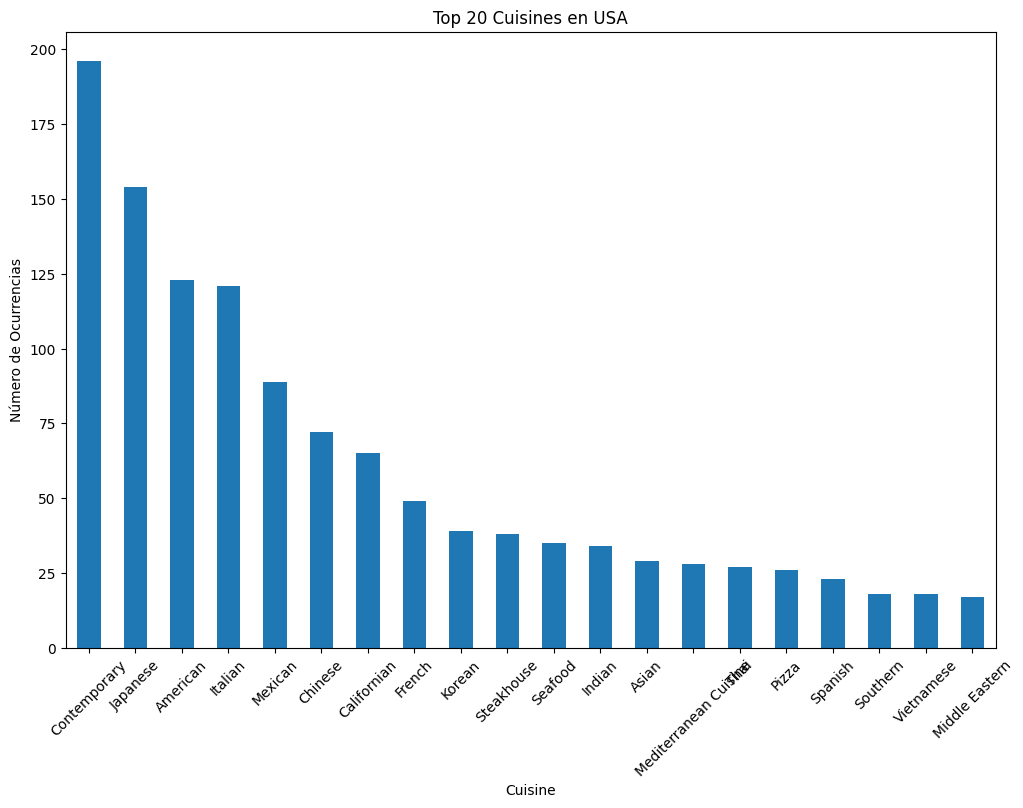

In [12]:
# Contar el número de ocurrencias por cuisine
cuisine_counts = usa_data['Cuisine'].value_counts()

# Tomar solo el top 20 de las cocinas
top_20_cuisines = cuisine_counts.head(20)

# Crear una gráfica de barras para mostrar las ocurrencias por cuisine
plt.figure(figsize=(12, 8))
top_20_cuisines.sort_values(ascending=False).plot(kind='bar')
plt.title('Top 20 Cuisines en USA')
plt.xlabel('Cuisine')
plt.ylabel('Número de Ocurrencias')
plt.xticks(rotation=45)
plt.show()

In [13]:
# Contar el número de ocurrencias por cuisine
cuisine_counts = usa_data['Cuisine'].value_counts()

# Tomar solo el top 20 de las cocinas
top_20_cuisines = cuisine_counts.head(20).index

# Filtrar los datos para incluir solo las filas con las cocinas del top 20
top_20_cuisine_data = usa_data[usa_data['Cuisine'].isin(top_20_cuisines)]

# Crear una tabla pivot para contar las ocurrencias de Award por cuisine
pivot_table_cuisine_awards = top_20_cuisine_data.pivot_table(index='Cuisine', columns='Award', aggfunc='size', fill_value=0)

# Añadir una columna para el total de premios y ordenar la tabla
pivot_table_cuisine_awards['Total Awards'] = pivot_table_cuisine_awards.sum(axis=1)
pivot_table_cuisine_awards_sorted = pivot_table_cuisine_awards.sort_values(by='Total Awards', ascending=False)

# Eliminar la columna 'Total Awards' antes de mostrar
pivot_table_cuisine_awards_sorted = pivot_table_cuisine_awards_sorted.drop(columns='Total Awards')

# Mostrar la tabla
print(pivot_table_cuisine_awards_sorted)

Award                  1 Star  2 Stars  3 Stars  Bib Gourmand  \
Cuisine                                                         
Contemporary               60       13        7            19   
Japanese                   44        5        1            20   
American                    9        1        1            19   
Italian                     7        1        0            34   
Mexican                     5        1        0            46   
Chinese                     1        0        0            37   
Californian                11        2        0             8   
French                      8        2        0             1   
Korean                     11        2        0             8   
Steakhouse                  3        0        0             0   
Seafood                     0        1        1             6   
Indian                      3        0        0            11   
Asian                       1        0        1             9   
Mediterranean Cuisine    

In [14]:
# Obtener los valores únicos de la columna 'City'
unique_cities = usa_data['City'].unique()

# Imprimir los valores únicos
print("Valores únicos en la columna 'City':")
print(unique_cities)

Valores únicos en la columna 'City':
['Washington' 'New York' 'Chicago' 'San Francisco' 'San Diego'
 'Healdsburg' 'Yountville' 'Miami' 'Tarrytown' 'Los Angeles' 'Oakland'
 'Hollywood' 'West Hollywood' 'Santa Monica' 'Elk' 'Tampa' 'Orlando'
 'Miami Beach' 'Winter Park' 'Surfside' 'Atlanta' 'Aspen' 'Denver'
 'Boulder' 'Los Alamos' 'Costa Mesa' 'Encino' 'Mountain View' 'San Mateo'
 'Sacramento' 'Carlsbad' 'San Anselmo' 'Paso Robles' 'Beverly Hills'
 'Carmel-by-the-Sea' 'Palo Alto' 'Atherton' 'Calistoga' 'Torrance' 'Napa'
 'Long Beach' 'Saratoga' 'Woodside' 'Redwood City' 'Rutherford'
 'Oceanside' 'Montecito' 'Geyserville' 'Saint Helena' 'Coral Gables'
 'Winter Garden' 'Irvington' 'Elmsford' 'Brooklyn' 'White Plains'
 'Hastings-on-Hudson' 'Rye' 'Pleasantville' 'Mount Kisco' 'New Rochelle'
 'Dobbs Ferry' 'Bronxville' 'Scarsdale' 'Eastchester' 'Avondale Estates'
 'Rowland Heights' 'Inglewood' 'Santa Barbara' 'Irvine' 'Los Gatos'
 'Mill Valley' 'Berkeley' 'San Jose' 'Garden Grove' 'Tustin' 'G

In [16]:
city_to_state = {
    'Washington': 'District of Columbia',
    'New York': 'New York',
    'Chicago': 'Illinois',
    'San Francisco': 'California',
    'San Diego': 'California',
    'Healdsburg': 'California',
    'Yountville': 'California',
    'Miami': 'Florida',
    'Tarrytown': 'New York',
    'Los Angeles': 'California',
    'Oakland': 'California',
    'Hollywood': 'California',
    'West Hollywood': 'California',
    'Santa Monica': 'California',
    'Elk': 'California',
    'Tampa': 'Florida',
    'Orlando': 'Florida',
    'Miami Beach': 'Florida',
    'Winter Park': 'Florida',
    'Surfside': 'Florida',
    'Atlanta': 'Georgia',
    'Aspen': 'Colorado',
    'Denver': 'Colorado',
    'Boulder': 'Colorado',
    'Los Alamos': 'New Mexico',
    'Costa Mesa': 'California',
    'Encino': 'California',
    'Mountain View': 'California',
    'San Mateo': 'California',
    'Sacramento': 'California',
    'Carlsbad': 'California',
    'San Anselmo': 'California',
    'Paso Robles': 'California',
    'Beverly Hills': 'California',
    'Carmel-by-the-Sea': 'California',
    'Palo Alto': 'California',
    'Atherton': 'California',
    'Calistoga': 'California',
    'Torrance': 'California',
    'Napa': 'California',
    'Long Beach': 'California',
    'Saratoga': 'California',
    'Woodside': 'California',
    'Redwood City': 'California',
    'Rutherford': 'California',
    'Oceanside': 'California',
    'Montecito': 'California',
    'Geyserville': 'California',
    'Saint Helena': 'California',
    'Coral Gables': 'Florida',
    'Winter Garden': 'Florida',
    'Irvington': 'New York',
    'Elmsford': 'New York',
    'Brooklyn': 'New York',
    'White Plains': 'New York',
    'Hastings-on-Hudson': 'New York',
    'Rye': 'New York',
    'Pleasantville': 'New York',
    'Mount Kisco': 'New York',
    'New Rochelle': 'New York',
    'Dobbs Ferry': 'New York',
    'Bronxville': 'New York',
    'Scarsdale': 'New York',
    'Eastchester': 'New York',
    'Avondale Estates': 'Georgia',
    'Rowland Heights': 'California',
    'Inglewood': 'California',
    'Santa Barbara': 'California',
    'Irvine': 'California',
    'Los Gatos': 'California',
    'Mill Valley': 'California',
    'Berkeley': 'California',
    'San Jose': 'California',
    'Garden Grove': 'California',
    'Tustin': 'California',
    'Glendale': 'California',
    'Temple City': 'California',
    'Alhambra': 'California',
    'Orange': 'California',
    'Petaluma': 'California',
    'Albany': 'California',
    'Bell Gardens': 'California',
    'Monrovia': 'California',
    'Arcadia': 'California',
    'Fairfax': 'California',
    'Corte Madera': 'California',
    'El Monte': 'California',
    'Pasadena': 'California',
    'Hayward': 'California',
    'Pomona': 'California',
    'Livermore': 'California',
    'San Gabriel': 'California',
    'El Cerrito': 'California',
    'Hermosa Beach': 'California',
    'Sausalito': 'California',
    'Roseville': 'California',
    'Campbell': 'California',
    'Solvang': 'California',
    'Venice': 'California',
    'Buena Park': 'California',
    'Newport Beach': 'California',
    'Rosemead': 'California',
    'Sebastopol': 'California',
    'San Juan Capistrano': 'California',
    'Sonoma': 'California',
    'Aptos': 'California',
    'Cerritos': 'California',
    'Alameda': 'California',
    'Glen Ellen': 'California',
    'San Leandro': 'California',
    'Manhattan Beach': 'California',
    'Fullerton': 'California',
    'Culver City': 'California',
    'Santa Ana': 'California',
    'Newbury Park': 'California',
    'La Puente': 'California',
    'Bronx': 'New York',
    'Gardena': 'California',
    'Katonah': 'New York',
    'Mamaroneck': 'New York',
    'Yonkers': 'New York',
    'Hartsdale': 'New York',
    'Peekskill': 'New York',
    'North Salem': 'New York',
    'Ardsley': 'New York',
    'Pound Ridge': 'New York',
    'Village of Pelham': 'New York',
    'Decatur': 'Georgia',
    'Chamblee': 'Georgia',
    'Avon': 'Colorado',
    'Vail': 'Colorado',
    'Marina del Rey': 'California',
    'Los Olivos': 'California',
    'Ojai': 'California',
    'Half Moon Bay': 'California',
    'Millbrae': 'California',
    'Seal Beach': 'California',
    'City of Industry': 'California',
    'Menlo Park': 'California',
    'Palm Springs': 'California',
    'Studio City': 'California',
    'Anaheim': 'California',
    'El Granada': 'California',
    'Monterey': 'California',
    'Carmel Valley': 'California',
    'Los Altos': 'California',
    'La Jolla': 'California',
    'Sherman Oaks': 'California',
    'Big Sur': 'California',
    'San Bruno': 'California',
    'Larkspur': 'California',
    'Inverness': 'California',
    'Pebble Beach': 'California',
    'Novato': 'California',
    'Coronado': 'California',
    'Lafayette': 'California',
    'Belmont': 'California',
    'Calabasas': 'California',
    'Boyle Heights': 'California',
    'Bodega Bay': 'California',
    'San Rafael': 'California',
    'Del Mar': 'California',
    'Laguna Beach': 'California',
    'Redondo Beach': 'California',
    'Point Reyes Station': 'California',
    'Pleasanton': 'California',
    'Rancho Santa Margarita': 'California',
    'Kentfield': 'California',
    'Huntington Beach': 'California',
    'San Carlos': 'California',
    'Vallejo': 'California',
    'Boonville': 'California',
    'Arroyo Grande': 'California',
    'San Luis Obispo': 'California',
    'Marshall': 'California',
    'Fountain Valley': 'California',
    'Forestville': 'California',
    'Rancho Palos Verdes': 'California',
    'Woodland Hills': 'California',
    'Burlingame': 'California',
    'Santa Cruz': 'California',
    'Cupertino': 'California',
    'Seaside': 'California',
}

# Leer el archivo CSV
df = pd.read_csv('unique_cities.csv')

# Añadir la columna 'State' al DataFrame
df['State'] = df['City'].map(city_to_state)

# Guardar el DataFrame actualizado en un nuevo archivo CSV
df.to_csv('unique_cities_with_states.csv', index=False)

# Mostrar el DataFrame resultante
print(df)


               City                 State
0        Washington  District of Columbia
1          New York              New York
2           Chicago              Illinois
3     San Francisco            California
4         San Diego            California
..              ...                   ...
178  Woodland Hills            California
179      Burlingame            California
180      Santa Cruz            California
181       Cupertino            California
182         Seaside            California

[183 rows x 2 columns]


In [17]:
# Leer el archivo CSV con la columna 'State' añadida
df = pd.read_csv('usa_data_with_states.csv')

# Contar el número de restaurantes por estado
restaurant_counts = df['State'].value_counts().reset_index()

# Renombrar las columnas para mayor claridad
restaurant_counts.columns = ['State', 'Restaurant Count']

# Ordenar los estados por el número de restaurantes de mayor a menor
restaurant_counts = restaurant_counts.sort_values(by='Restaurant Count', ascending=False)

# Mostrar el DataFrame resultante
print(restaurant_counts)

                  State  Restaurant Count
0            California               583
1              New York               410
2              Illinois               143
3               Florida               143
4  District of Columbia               117
5               Georgia                45
6              Colorado                33
7            New Mexico                 1


In [18]:
# Contar el número de tipos de cocina por estado
cuisine_counts = df.groupby('State')['Cuisine'].value_counts().reset_index(name='Cuisine Count')

# Ordenar los resultados por el número de tipos de cocina en orden descendente
cuisine_counts = cuisine_counts.sort_values(by='Cuisine Count', ascending=False)

# Mostrar el DataFrame resultante
print(cuisine_counts)

          State           Cuisine  Cuisine Count
0    California          Japanese             74
2    California      Contemporary             65
1    California       Californian             65
209    New York      Contemporary             55
3    California           Italian             48
..          ...               ...            ...
140     Florida          Filipino              1
141     Florida         Gastropub              1
142     Florida  Italian-American              1
143     Florida               Lao              1
269    New York        Venezuelan              1

[270 rows x 3 columns]


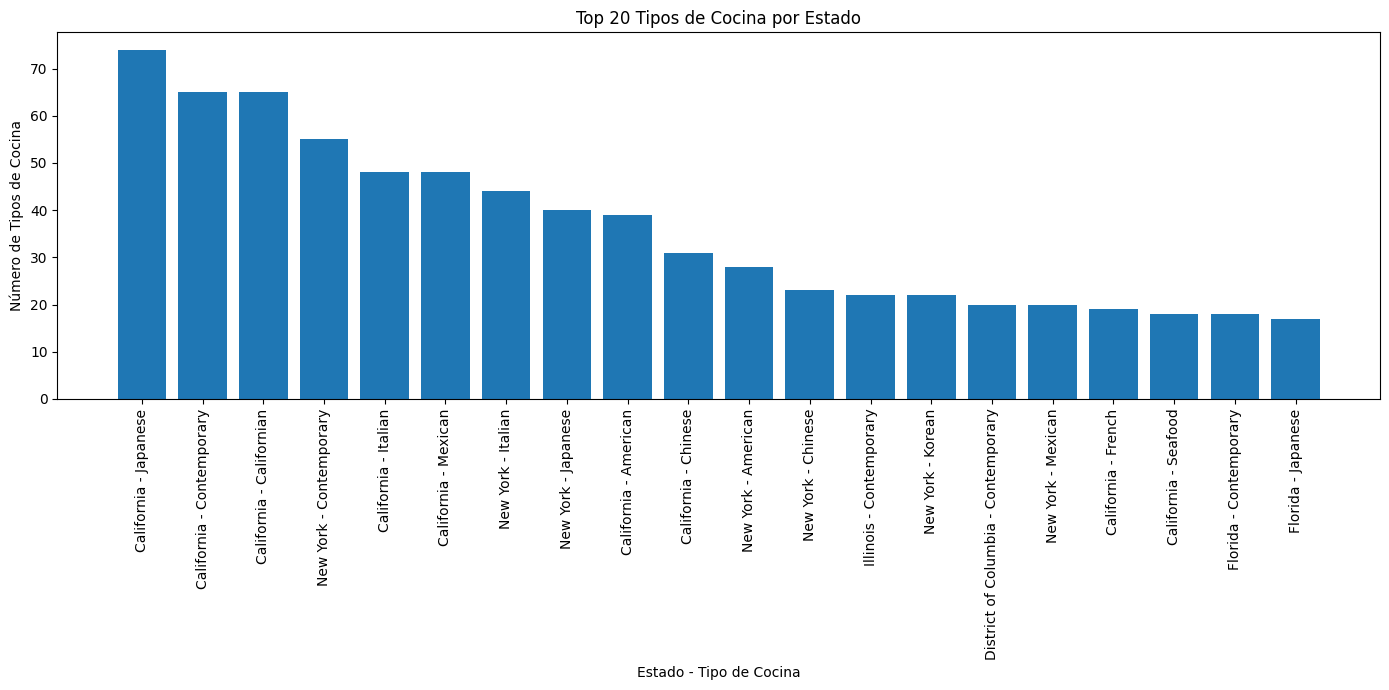

In [20]:
# Tomar los 20 primeros resultados
top_20_cuisine_counts = cuisine_counts.head(20)

# Crear la gráfica
plt.figure(figsize=(14, 7))
plt.bar(top_20_cuisine_counts['State'] + ' - ' + top_20_cuisine_counts['Cuisine'], top_20_cuisine_counts['Cuisine Count'])

# Configurar etiquetas y título
plt.xlabel('Estado - Tipo de Cocina')
plt.ylabel('Número de Tipos de Cocina')
plt.title('Top 20 Tipos de Cocina por Estado')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad

# Mostrar la gráfica
plt.tight_layout()
plt.show()

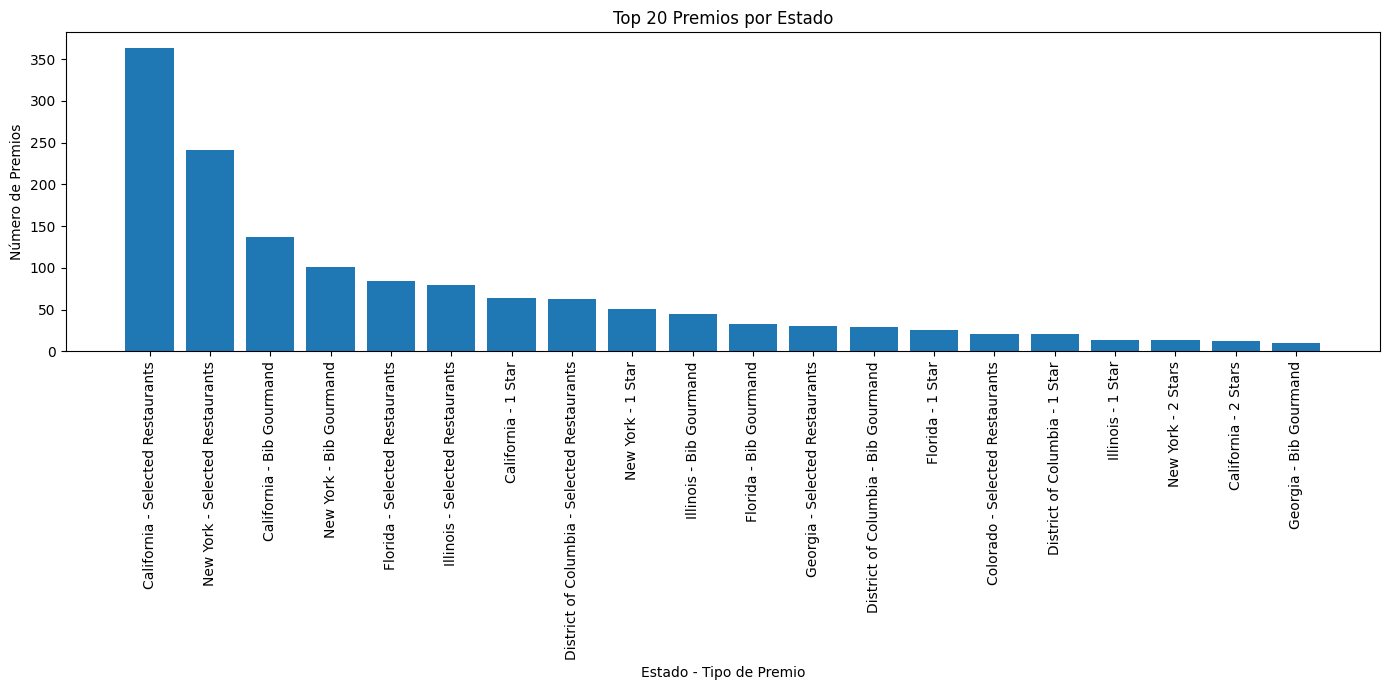

In [21]:
# Contar el número de premios por estado
award_counts = df.groupby('State')['Award'].value_counts().reset_index(name='Award Count')

# Ordenar los resultados por el número de premios en orden descendente
award_counts = award_counts.sort_values(by='Award Count', ascending=False)

# Tomar los 20 primeros resultados
top_20_award_counts = award_counts.head(20)

# Crear la gráfica
plt.figure(figsize=(14, 7))
plt.bar(top_20_award_counts['State'] + ' - ' + top_20_award_counts['Award'], top_20_award_counts['Award Count'])

# Configurar etiquetas y título
plt.xlabel('Estado - Tipo de Premio')
plt.ylabel('Número de Premios')
plt.title('Top 20 Premios por Estado')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [23]:
# Crear una tabla de contingencia de 'Award' y 'Price Level'
contingency_table = pd.crosstab(df['Award'], df['Price Level'])

# Realizar la prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Mostrar los resultados de la prueba de chi-cuadrado
print("Tabla de Contingencia:")
print(contingency_table)
print("\nResultados de la Prueba de Chi-Cuadrado:")
print(f"Chi-cuadrado: {chi2}")
print(f"Grados de libertad: {dof}")
print(f"Valor p: {p}")

# Interpretación del valor p
alpha = 0.05
if p < alpha:
    print("\nHay una dependencia significativa entre Award y Price Level (rechazar H0)")
else:
    print("\nNo hay una dependencia significativa entre Award y Price Level (no rechazar H0)")

Tabla de Contingencia:
Price Level            1    2    3    4
Award                                  
1 Star                 0    3   23  160
2 Stars                0    0    0   32
3 Stars                0    0    0   13
Bib Gourmand          40  309   13    0
Selected Restaurants  37  227  412  206

Resultados de la Prueba de Chi-Cuadrado:
Chi-cuadrado: 993.8468312106447
Grados de libertad: 12
Valor p: 3.94050393849315e-205

Hay una dependencia significativa entre Award y Price Level (rechazar H0)


In [24]:
 #Crear una tabla de contingencia de 'Award' y 'State'
contingency_table2 = pd.crosstab(df['Award'], df['State'])

# Realizar la prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table2)

# Mostrar los resultados de la prueba de chi-cuadrado
print("Tabla de Contingencia:")
print(contingency_table2)
print("\nResultados de la Prueba de Chi-Cuadrado:")
print(f"Chi-cuadrado: {chi2}")
print(f"Grados de libertad: {dof}")
print(f"Valor p: {p}")

# Interpretación del valor p
alpha = 0.05
if p < alpha:
    print("\nHay una dependencia significativa entre Award y State (rechazar H0)")
else:
    print("\nNo hay una dependencia significativa entre Award y State (no rechazar H0)")

Tabla de Contingencia:
State                 California  Colorado  District of Columbia  Florida  \
Award                                                                       
1 Star                        64         5                    21       25   
2 Stars                       12         0                     3        1   
3 Stars                        6         0                     1        0   
Bib Gourmand                 137         7                    29       33   
Selected Restaurants         364        21                    63       84   

State                 Georgia  Illinois  New Mexico  New York  
Award                                                          
1 Star                      5        14           1        51  
2 Stars                     0         3           0        13  
3 Stars                     0         2           0         4  
Bib Gourmand               10        45           0       101  
Selected Restaurants       30        79           0  

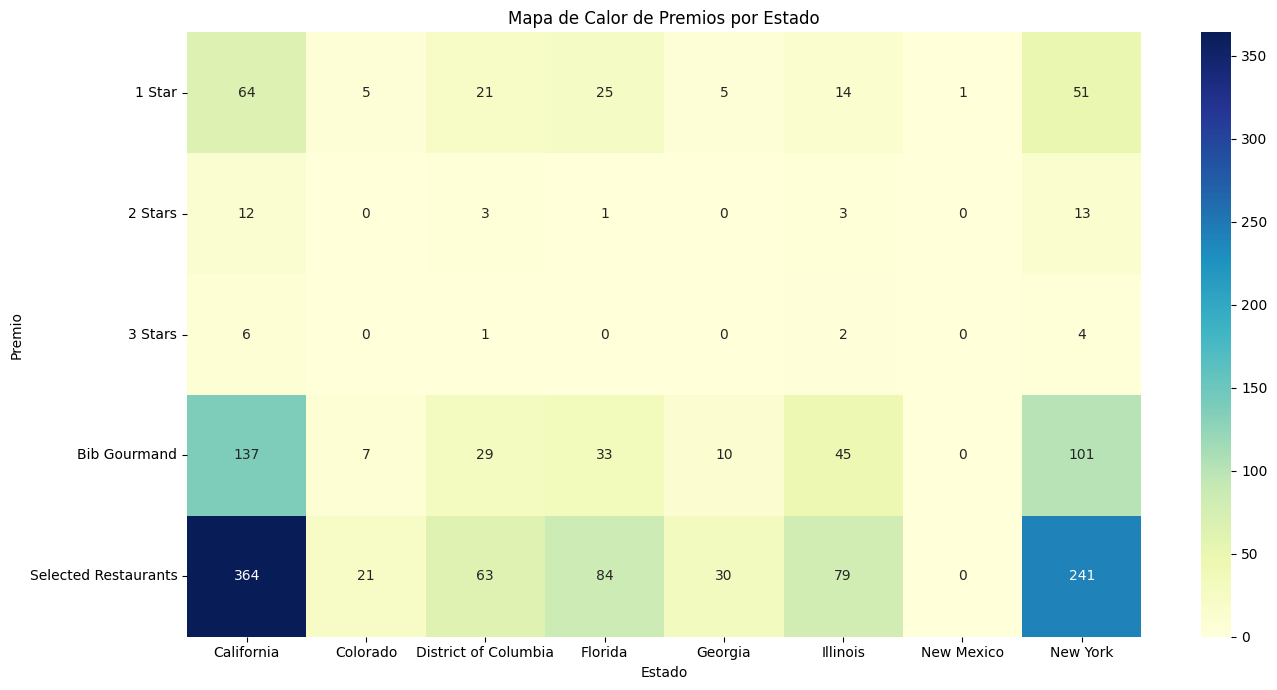

In [25]:
# Crear el heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(contingency_table2, annot=True, fmt="d", cmap="YlGnBu")

# Configurar etiquetas y título
plt.xlabel('Estado')
plt.ylabel('Premio')
plt.title('Mapa de Calor de Premios por Estado')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

Tabla de Contingencia (Top 10):
Cuisine               Contemporary  Japanese  American  Italian  Mexican  \
Award                                                                      
Selected Restaurants            97        84        93       79       37   
Bib Gourmand                    19        20        19       34       46   
1 Star                          60        44         9        7        5   
2 Stars                         13         5         1        1        1   
3 Stars                          7         1         1        0        0   

Cuisine               Chinese  Californian  French  Korean  Steakhouse  
Award                                                                   
Selected Restaurants       34           44      38      18          35  
Bib Gourmand               37            8       1       8           0  
1 Star                      1           11       8      11           3  
2 Stars                     0            2       2       2           0

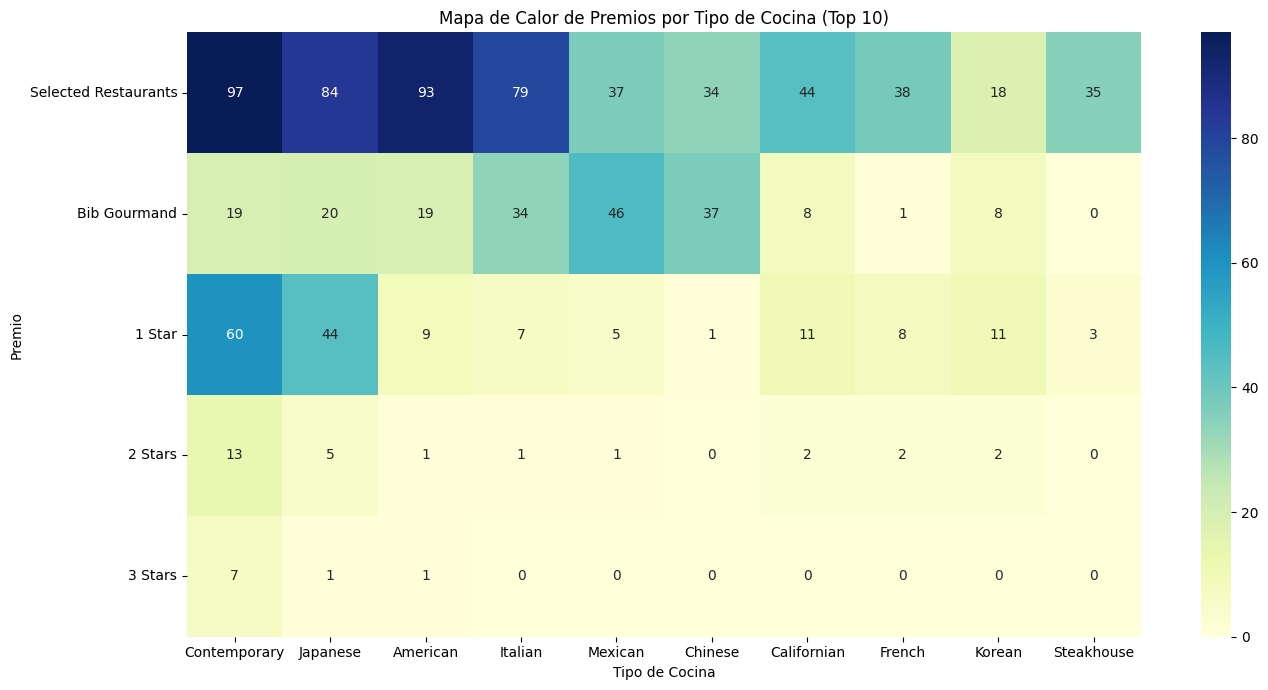

In [28]:
# Crear una tabla de contingencia de 'Award' y 'Cuisine'
contingency_table3 = pd.crosstab(df['Award'], df['Cuisine'])

# Seleccionar las 10 primeras filas y 10 primeras columnas más relevantes
top_awards = contingency_table3.sum(axis=1).sort_values(ascending=False).head(10).index
top_cuisines = contingency_table3.sum(axis=0).sort_values(ascending=False).head(10).index
contingency_table3_top10 = contingency_table3.loc[top_awards, top_cuisines]

# Realizar la prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table3_top10)

# Mostrar los resultados de la prueba de chi-cuadrado
analysis_results = {
    "Chi-cuadrado": chi2,
    "Grados de libertad": dof,
    "Valor p": p
}

# Imprimir la tabla de contingencia y los resultados de la prueba de chi-cuadrado
print("Tabla de Contingencia (Top 10):")
print(contingency_table3_top10)
print("\nResultados de la Prueba de Chi-Cuadrado:")
for key, value in analysis_results.items():
    print(f"{key}: {value}")

# Crear el heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(contingency_table3_top10, annot=True, fmt="d", cmap="YlGnBu")

# Configurar etiquetas y título
plt.xlabel('Tipo de Cocina')
plt.ylabel('Premio')
plt.title('Mapa de Calor de Premios por Tipo de Cocina (Top 10)')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

#### Hay una dependencia significativa entre Award y Cuisine (rechazar H0).
#### Esto significa que el tipo de premio (Award) está significativamente relacionado con el tipo de cocina (Cuisine) en tu conjunto de datos. Esta dependencia puede reflejar que ciertos tipos de cocina son más propensos a recibir ciertos tipos de premios.

## Top 5 de estado y de cuisine por Award

C:\Users\Edgar\AppData\Local\Temp\ipykernel_12132\1574817151.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_cuisines.index, y=top_5_cuisines.values, palette='viridis')


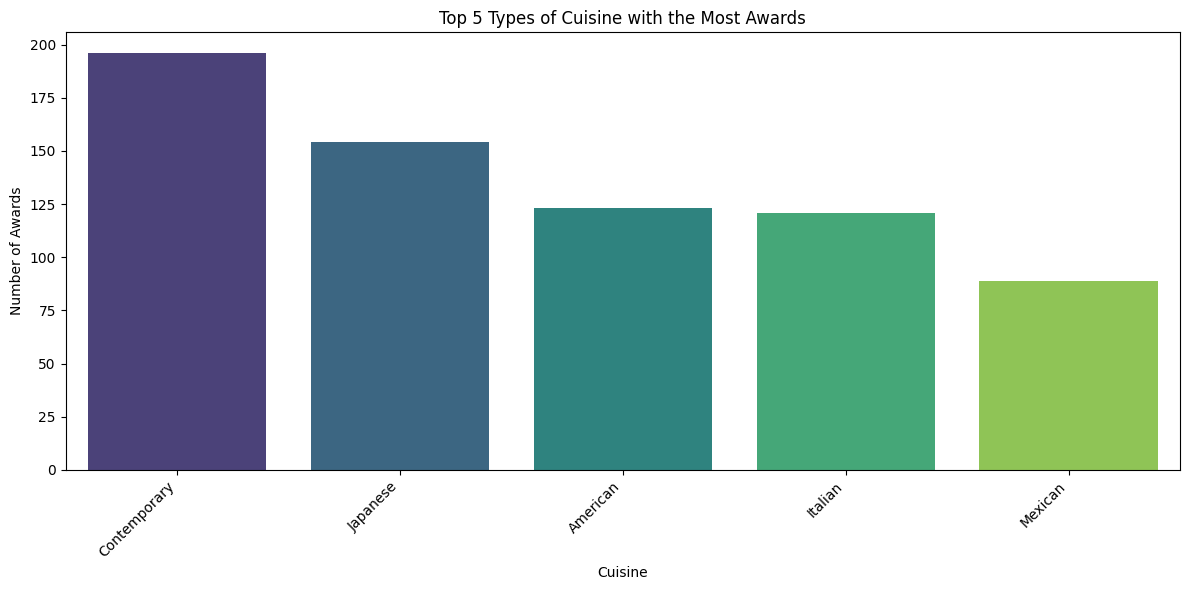

C:\Users\Edgar\AppData\Local\Temp\ipykernel_12132\1574817151.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_states.index, y=top_5_states.values, palette='viridis')


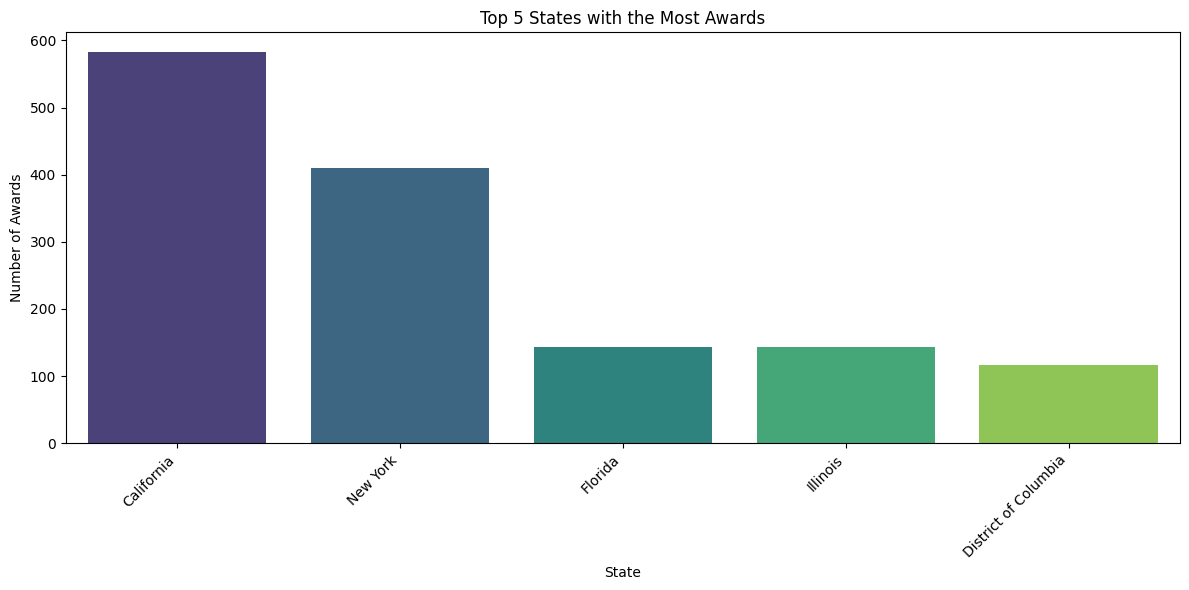

In [29]:
# Crear una tabla de contingencia de 'Award' y 'Cuisine'
contingency_table_cuisine = pd.crosstab(df['Award'], df['Cuisine'])

# Calcular el total de premios para cada tipo de cocina
total_awards_per_cuisine = contingency_table_cuisine.sum(axis=0)

# Identificar los top 5 tipos de cocina con más premios
top_5_cuisines = total_awards_per_cuisine.sort_values(ascending=False).head(5)

# Crear una tabla de contingencia de 'Award' y 'State'
contingency_table_state = pd.crosstab(df['Award'], df['State'])

# Calcular el total de premios para cada estado
total_awards_per_state = contingency_table_state.sum(axis=0)

# Identificar los top 5 estados con más premios
top_5_states = total_awards_per_state.sort_values(ascending=False).head(5)

# Visualizar el top 5 de tipos de cocina con más premios en un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_cuisines.index, y=top_5_cuisines.values, palette='viridis')
plt.title('Top 5 Types of Cuisine with the Most Awards')
plt.xlabel('Cuisine')
plt.ylabel('Number of Awards')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualizar el top 5 de estados con más premios en un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_states.index, y=top_5_states.values, palette='viridis')
plt.title('Top 5 States with the Most Awards')
plt.xlabel('State')
plt.ylabel('Number of Awards')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()